# Python Team Project: Predicting Major League Basesball Game Outcomes

## Part 1: Data Wrangling

In [4]:
# packages

import pandas as pd
import sqlalchemy as db
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.linear_model import LinearRegression
import datetime as dt

In [5]:
df_mlb = pd.read_csv('mlb_data.csv')

In [6]:
df_mlb.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,10/27/2020,2020,1,w,LAD,TBD,1607.757915,1564.177984,0.582851,0.417149,...,54.055790,54.534448,7.995742,6.040024,0.594547,0.405453,1612.374351,1561.153482,3,1
1,10/25/2020,2020,1,w,TBD,LAD,1566.449752,1605.486147,0.425652,0.574348,...,52.966933,57.214954,-1.826734,23.114096,0.368716,0.631284,1562.804875,1610.722958,2,4
2,10/24/2020,2020,1,w,TBD,LAD,1563.862158,1608.073741,0.415971,0.584029,...,52.636552,50.974099,-3.959517,-6.204884,0.411161,0.588839,1564.204361,1609.323472,8,7
3,10/23/2020,2020,1,w,TBD,LAD,1567.099442,1604.836456,0.428091,0.571909,...,57.971157,55.937980,20.546588,18.098422,0.420376,0.579624,1562.243577,1611.284256,2,6
4,10/21/2020,2020,1,w,LAD,TBD,1608.352409,1563.583490,0.585068,0.414932,...,54.975487,54.421564,13.013222,4.009710,0.611092,0.388908,1608.914363,1564.613470,4,6


In [7]:
df_mlb.drop(columns=['rating1_pre', 'rating2_pre', 'pitcher2', 'pitcher1_rgs', 'pitcher2_rgs', 
                     'pitcher2_adj', 'rating_prob2', 'rating2_post'], inplace=True)

In [8]:
df_mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50217 entries, 0 to 50216
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          50217 non-null  object 
 1   season        50217 non-null  int64  
 2   neutral       50217 non-null  int64  
 3   playoff       731 non-null    object 
 4   team1         50217 non-null  object 
 5   team2         50217 non-null  object 
 6   elo1_pre      50217 non-null  float64
 7   elo2_pre      50217 non-null  float64
 8   elo_prob1     50217 non-null  float64
 9   elo_prob2     50217 non-null  float64
 10  elo1_post     50217 non-null  float64
 11  elo2_post     50217 non-null  float64
 12  pitcher1      50217 non-null  object 
 13  pitcher1_adj  50214 non-null  float64
 14  rating_prob1  50217 non-null  float64
 15  rating1_post  50217 non-null  float64
 16  score1        50217 non-null  int64  
 17  score2        50217 non-null  int64  
dtypes: float64(9), int64(4), o

In [9]:
# exclude the 2020 season to eliminate pandemic-related abnormalities
df_mlb = df_mlb[df_mlb.season != 2020]

In [10]:
df_mlb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49266 entries, 951 to 50216
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          49266 non-null  object 
 1   season        49266 non-null  int64  
 2   neutral       49266 non-null  int64  
 3   playoff       678 non-null    object 
 4   team1         49266 non-null  object 
 5   team2         49266 non-null  object 
 6   elo1_pre      49266 non-null  float64
 7   elo2_pre      49266 non-null  float64
 8   elo_prob1     49266 non-null  float64
 9   elo_prob2     49266 non-null  float64
 10  elo1_post     49266 non-null  float64
 11  elo2_post     49266 non-null  float64
 12  pitcher1      49266 non-null  object 
 13  pitcher1_adj  49263 non-null  float64
 14  rating_prob1  49266 non-null  float64
 15  rating1_post  49266 non-null  float64
 16  score1        49266 non-null  int64  
 17  score2        49266 non-null  int64  
dtypes: float64(9), int64(4),

In [11]:
# fill in missing values in teh pitcher1_adj column with the mean
df_mlb = df_mlb.fillna(df_mlb.mean())

In [12]:
# drop records that are a playoff game
df_mlb = df_mlb[df_mlb.playoff.str.contains('NaN',case=False,na=True)]

In [13]:
# drop records where the location is neutral (where 'neutral' = 0)
df_mlb = df_mlb[df_mlb.neutral == 0]

In [14]:
# verify that all values in the playoff column are null, and check that all other columns are complete
df_mlb.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48557 entries, 988 to 50216
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          48557 non-null  object 
 1   season        48557 non-null  int64  
 2   neutral       48557 non-null  int64  
 3   playoff       0 non-null      object 
 4   team1         48557 non-null  object 
 5   team2         48557 non-null  object 
 6   elo1_pre      48557 non-null  float64
 7   elo2_pre      48557 non-null  float64
 8   elo_prob1     48557 non-null  float64
 9   elo_prob2     48557 non-null  float64
 10  elo1_post     48557 non-null  float64
 11  elo2_post     48557 non-null  float64
 12  pitcher1      48557 non-null  object 
 13  pitcher1_adj  48557 non-null  float64
 14  rating_prob1  48557 non-null  float64
 15  rating1_post  48557 non-null  float64
 16  score1        48557 non-null  int64  
 17  score2        48557 non-null  int64  
dtypes: float64(9), int64(4),

In [15]:
# drop the 'playoff' and 'neutral' columns (since they are all the same, and won't play a role in our analysis)
df_mlb.drop(columns=['neutral', 'playoff'], inplace=True)

In [16]:
# create column to classify the game by team 1 winning or losing. 1 denotes a home win.
df_mlb['Home Win'] = np.where(df_mlb['score1'] > df_mlb['score2'], 1, 0)

In [17]:
# rename columns to be more readable
df_mlb.rename(columns={'date':'Date', 'season':'Season', 
                         'team1':'Home Team', 'team2':'Away Team',
                         'elo1_pre':'Home Pre Elo','elo2_pre':'Away Pre Elo',
                         'elo_prob1':'Home %','elo_prob2':'Away %','elo1_post':'Home Post Elo',
                         'elo2_post':'Away Post Elo','pitcher1':'Starting Pitcher',
                         'pitcher1_adj':'Starting Pitcher ADJ','rating_prob1':'Starting Pitcher Win %',
                          'rating1_post':'Starting Pitcher Rating', 'score1':'Home Score','score2':'Away Score'}, 
                     inplace=True)
df_mlb.head()

,Date,Season,Home Team,Away Team,Home Pre Elo,Away Pre Elo,Home %,Away %,Home Post Elo,Away Post Elo,Starting Pitcher,Starting Pitcher ADJ,Starting Pitcher Win %,Starting Pitcher Rating,Home Score,Away Score,Home Win
988,9/29/2019,2019,STL,CHC,1545.306947,1531.092895,0.554774,0.445226,1548.950901,1527.448942,Jack Flaherty,45.053652,0.644813,1545.776596,9,0,1
989,9/29/2019,2019,KCR,MIN,1429.995452,1549.426829,0.366016,0.633984,1431.835083,1547.587197,Jorge Lopez,-18.509968,0.384372,1430.506140,5,4,1
990,9/29/2019,2019,SEA,OAK,1467.732500,1577.147150,0.379496,0.620504,1470.179263,1574.700387,Justin Dunn,5.136325,0.418133,1465.818655,3,1,1
991,9/29/2019,2019,NYM,ATL,1528.343228,1548.881950,0.504981,0.495019,1529.727245,1547.497933,Noah Syndergaard,-6.560683,0.474830,1533.426584,7,6,1
992,9/29/2019,2019,COL,MIL,1469.463417,1534.015807,0.441904,0.558096,1471.027665,1532.451559,Jeff Hoffman,-12.012266,0.448627,1482.362549,4,3,1


## Part 2: Data Visualization

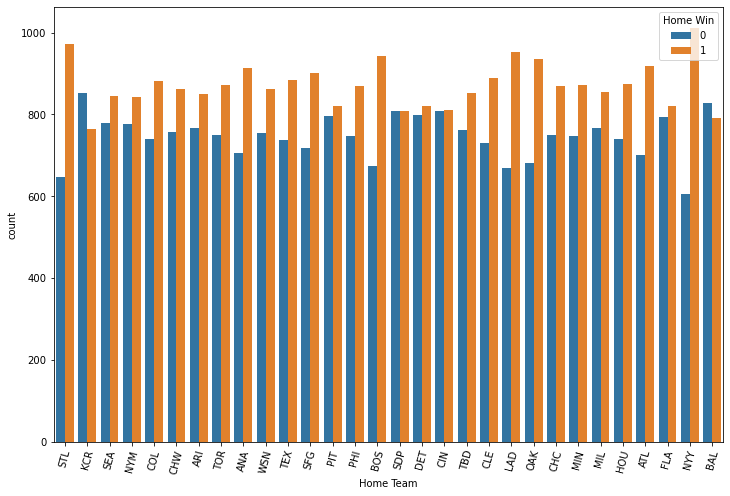

In [18]:
sns.countplot(x='Home Team', hue='Home Win', data=df_mlb)
plt.xticks(rotation=75, fontweight='light')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

# The orange bars show the count of wins for each team

In [19]:
# sort by team, and calculate the percentage of 'Home Win' = '1'
df_mlb.groupby('Home Team')['Home Win'].value_counts(1)

Home Team  Home Win
ANA        1           0.563928
           0           0.436072
ARI        1           0.525958
           0           0.474042
ATL        1           0.567634
           0           0.432366
BAL        0           0.511743
           1           0.488257
BOS        1           0.582818
           0           0.417182
CHC        1           0.537037
           0           0.462963
CHW        1           0.532716
           0           0.467284
CIN        1           0.500617
           0           0.499383
CLE        1           0.549165
           0           0.450835
COL        1           0.543492
           0           0.456508
DET        1           0.506799
           0           0.493201
FLA        1           0.508055
           0           0.491945
HOU        1           0.541460
           0           0.458540
KCR        0           0.526902
           1           0.473098
LAD        1           0.587292
           0           0.412708
MIL        1        

In [20]:
team_win_pct = {'Team':['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 
                        'DET', 'FLA', 'HOU', 'KCR', 'LAD', 'MIL', 'MIN', 'NYM', 'NYY', 'OAK', 
                        'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 
                        'STL', 'TBD', 'TEX', 'TOR', 'WSN'], 
                'Win Percent':[0.563928, 0.525958, 0.567634, 0.488257, 0.582818, 
                               0.537037, 0.532716, 0.500617, 0.549165, 0.543492, 
                              0.506799, 0.508055, 0.541460, 0.473098, 0.587292, 
                              0.527160, 0.537986, 0.520074, 0.625464, 0.578589, 
                              0.537701, 0.507426, 0.499691, 0.520345, 0.556447, 
                              0.600617, 0.528173, 0.545623, 0.537940, 0.533704]}

win_pct = pd.DataFrame.from_dict(team_win_pct)
win_pct

,Team,Win Percent
0,ANA,0.563928
1,ARI,0.525958
2,ATL,0.567634
3,BAL,0.488257
4,BOS,0.582818
5,CHC,0.537037
6,CHW,0.532716
7,CIN,0.500617
8,CLE,0.549165
9,COL,0.543492


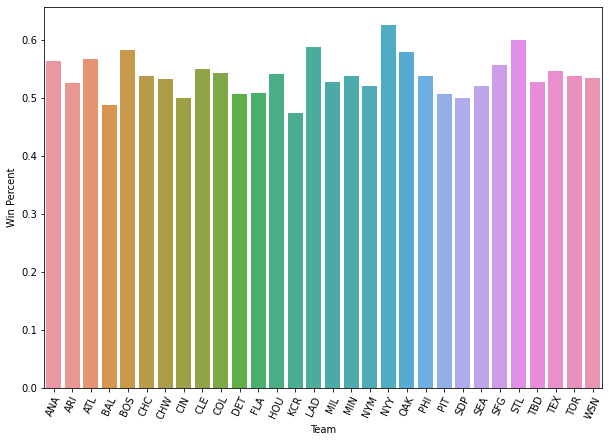

In [21]:
sns.barplot(x='Team',y='Win Percent', data=win_pct)
plt.xticks(rotation=65, fontweight='light')
fig = plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

# this bar chart normalizes the win count and shows each teams performance relative to the League

## Part 3: Forming the Train and Test Sets

**The Y variable that we are trying to predict is Home Win.**

* **The first test will utilize 'Home Post Elo' as the X.**

* **The second test will try 'Starting Pitcher Win %' for the X.**

In [22]:
df_mlb_pitcher = df_mlb

In [23]:
x = df_mlb_pitcher['Starting Pitcher Win %']
y = df_mlb_pitcher['Home Win']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.1, random_state=22)

In [25]:
x_train.shape

(43701,)

In [26]:
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [27]:
x_train.shape

(43701, 1)

In [28]:
pitcher_model = RandomForestRegressor(n_estimators=75, max_depth=3, bootstrap=True)
pitcher_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=75)

In [29]:
y_pred = pitcher_model.predict(x_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

r2 = r2_score(y_test, y_pred)
print('R-Squared:', r2)


Mean squared error: 0.24420161768606094
R-Squared: 0.019745535677916592


**Results: Mean squared error: 0.24417571151129278 , R-Squared: 0.0198495261580397**

In [31]:
# Use Random CV to check for the most optimal parameters:

In [32]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 6, 9, 12, 15],
    'n_estimators': [10, 25, 50, 75, 100, 200]
}

In [33]:
model = RandomForestRegressor()

In [34]:
model_random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 50, 
                                  cv = 5, verbose=2, random_state=22, n_jobs = -1)

In [35]:
model_random.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\laura\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [3, 6, 9, 12, 15],
                                        'n_estimators': [10, 25, 50, 75, 100,
                                                         200]},
                   random_state=22, verbose=2)

In [36]:
model_random.best_params_
# based on this result, I will change the above parameters (estimators = 75)

{'n_estimators': 100, 'max_depth': 3, 'bootstrap': True}

### Now we will try adding multiple columns to the X variable of the random forest model.

In [37]:
# First, test with 2 variables

In [38]:
x2 = df_mlb_pitcher[['Starting Pitcher Win %', 'Starting Pitcher Rating']]
y2 = df_mlb_pitcher['Home Win']

In [39]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2,
                                                    test_size=0.1, random_state=22)

In [40]:
#x2_train = x2_train.values.reshape(-1, 1)
#x2_test = x2_test.values.reshape(-1, 1)

In [41]:
x2_train

,Starting Pitcher Win %,Starting Pitcher Rating
26250,0.621175,1485.281000
36384,0.571989,1483.889000
4036,0.714072,1605.272924
15363,0.512407,1518.189000
17357,0.570777,1564.571000
...,...,...
24364,0.528740,1524.391000
26299,0.416522,1443.148000
33137,0.524039,1490.486000
30911,0.573796,1462.588000


In [42]:
pitcher_model2 = RandomForestRegressor(n_estimators=75, max_depth=3, bootstrap=True)
pitcher_model2.fit(x2_train, y2_train)

RandomForestRegressor(max_depth=3, n_estimators=75)

In [43]:
y_pred2 = pitcher_model2.predict(x2_test)

In [44]:
mse = mean_squared_error(y2_test, y_pred2)
print('Mean squared error:', mse)

r2 = r2_score(y2_test, y_pred2)
print('R-Squared:', r2)

Mean squared error: 0.24294254125582185
R-Squared: 0.02479961887097415


**results: Mean squared error: 0.2429595092589205 , R-Squared: 0.02473150727963558**

### Adding more variables:

In [45]:
# Add columns relevant to Pitchers along with the Home Win %

In [46]:
x3 = df_mlb_pitcher[['Starting Pitcher Win %', 'Starting Pitcher Rating', 'Home %', 'Starting Pitcher ADJ']]
y3 = df_mlb_pitcher['Home Win']

In [47]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3,
                                                    test_size=0.1, random_state=22)

In [48]:
pitcher_model = RandomForestRegressor(n_estimators=75, max_depth=3, bootstrap=True)
pitcher_model.fit(x3_train, y3_train)

RandomForestRegressor(max_depth=3, n_estimators=75)

In [49]:
y_pred = pitcher_model.predict(x3_test)

In [50]:
mse = mean_squared_error(y3_test, y_pred)
print('Mean squared error:', mse)

r2 = r2_score(y3_test, y_pred)
print('R-Squared:', r2)

Mean squared error: 0.24285380332723472
R-Squared: 0.02515582351644896


**results: Mean squared error: 0.24284070590743967 , R-Squared: 0.02520839812404929**

## Now, to test the model using Elo:

In [51]:
df_mlb_elo = df_mlb

In [52]:
z = df_mlb_elo['Home Post Elo']
y = df_mlb_elo['Home Win']

In [53]:
z_train, z_test, y_train, y_test = train_test_split(df_mlb_elo['Home Post Elo'], df_mlb_elo['Home Win'], 
                                                        test_size=0.1, random_state=33)

In [54]:
z_train.shape

(43701,)

In [55]:
z_train = z_train.values.reshape(-1, 1)
z_test = z_test.values.reshape(-1, 1)

In [56]:
z_train.shape

(43701, 1)

In [57]:
elo_model = RandomForestRegressor(n_estimators=25, max_depth=3, bootstrap=True)
elo_model.fit(z_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=25)

In [58]:
y_pred = elo_model.predict(z_test)

In [59]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

r2 = r2_score(y_test, y_pred)
print('R-Squared:', r2)

Mean squared error: 0.24223555740414818
R-Squared: 0.02724541747386544


**results: Mean squared error: 0.24220663663462347 , R-Squared: 0.02736155571296961**

In [60]:
# Use Random CV to check for the most optimal parameters:

In [61]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 6, 9, 12, 15],
    'n_estimators': [10, 25, 50, 75, 100, 200]
}

In [62]:
model = RandomForestRegressor()

In [63]:
model_random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 50, 
                                  cv = 5, verbose=2, random_state=33, n_jobs = -1)

In [64]:
model_random.fit(z_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\laura\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [3, 6, 9, 12, 15],
                                        'n_estimators': [10, 25, 50, 75, 100,
                                                         200]},
                   random_state=33, verbose=2)

In [65]:
model_random.best_params_
# based on this result, I will change the above parameters (estimators = 25)

{'n_estimators': 25, 'max_depth': 3, 'bootstrap': True}

### **Now we will test this Elo version with multiple variables.**

In [66]:
# test with 2 variables:

In [67]:
z2 = df_mlb_elo[['Home Post Elo', 'Home Pre Elo']]
y2 = df_mlb_elo['Home Win']

In [69]:
z2.shape

(48557, 2)

In [70]:
z2_train, z2_test, y2_train, y2_test = train_test_split(z2, y2, 
                                                        test_size=0.1, random_state=33)

In [71]:
z2_train.shape

(43701, 2)

In [72]:
elo_model2 = RandomForestRegressor(n_estimators=25, max_depth=3, bootstrap=True)
elo_model2.fit(z2_train, y2_train)

RandomForestRegressor(max_depth=3, n_estimators=25)

In [73]:
y_pred2 = elo_model2.predict(z2_test)

In [74]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

r2 = r2_score(y2_test, y_pred2)
print('R-Squared:', r2)

Mean squared error: 0.24223555740414818
R-Squared: 0.1404797927076975


**Results : Mean squared error: 0.24220663663462347 , R-Squared: 0.1456917406542324**

In [75]:
# adding more variables:

In [76]:
z3 = df_mlb_elo[['Home Post Elo', 'Home Pre Elo', 'Home %', ]]
y3 = df_mlb_elo['Home Win']

In [77]:
z3_train, z3_test, y3_train, y3_test = train_test_split(z3, y3, 
                                                        test_size=0.1, random_state=33)

In [78]:
elo_model3 = RandomForestRegressor(n_estimators=11, max_depth=6, bootstrap=True)
elo_model3.fit(z3_train, y3_train)

RandomForestRegressor(max_depth=6, n_estimators=11)

In [79]:
y_pred3 = elo_model3.predict(z3_test)

In [80]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

r2 = r2_score(y3_test, y_pred3)
print('R-Squared:', r2)

Mean squared error: 0.24223555740414818
R-Squared: 0.27216019401711233


* **original results: Mean squared error: 0.24220663663462347 , R-Squared: 0.14746807390713634**
* **results after tuning: Mean squared error: 0.21625632679280196 , R-Squared: 0.31131032024785277**

* ok... so, increasing max_depth to drastically large #s continues to improve the results. I.e; depth of 55 (which is the best, we found) gives r2 of 0.9655
* we decided on a max_depth of 6, and then played around with the number of trees to find the best result
* 11 trees yields the highest R^2 !

**Given that adding pitcher data didn't improve the model, we are going to tune parameters for this instance of the model**

In [81]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 6, 9, 12, 15],
    'n_estimators': [10, 25, 50, 75, 100, 200]
}

In [82]:
model = RandomForestRegressor()

In [83]:
model_random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 50, 
                                  cv = 5, verbose=2, random_state=33, n_jobs = -1)

In [84]:
model_random.fit(z_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\laura\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [2, 3, 6, 9, 12, 15],
                                        'n_estimators': [10, 25, 50, 75, 100,
                                                         200]},
                   random_state=33, verbose=2)

In [85]:
model_random.best_params_

{'n_estimators': 200, 'max_depth': 3, 'bootstrap': True}

The Random CV is saying that 50 estimators is better than 25, but we have tested it multiple times, and that is false.
From what we can tell, est=25 and depth=3 is our best bet (yet).

## Making a New Model: Elo + Pitcher

In [86]:
# since the 4-variable test on Pitcher model didn't really improve over the 2-variable test,
# we will test the best-performing Elo model with the addition of 'Starting Pitcher Win %', 'Starting Pitcher Rating'

In [87]:
xx = df_mlb[['Home Post Elo', 'Home Pre Elo', 'Home %', 'Starting Pitcher Win %', 'Starting Pitcher Rating']]
yy = df_mlb['Home Win']

In [88]:
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, 
                                                        test_size=0.1, random_state=33)

In [89]:
xx_train.shape

(43701, 5)

In [193]:
model = RandomForestRegressor(n_estimators=29, max_depth=6, bootstrap=True)
model.fit(xx_train, yy_train)

RandomForestRegressor(max_depth=6, n_estimators=29)

In [194]:
y_pred = model.predict(xx_test)

In [195]:
mse = mean_squared_error(yy_test, y_pred)
print('Mean squared error:', mse)

r2 = r2_score(yy_test, y_pred)
print('R-Squared:', r2)

Mean squared error: 0.17246994727099577
R-Squared: 0.3074058434947631


* **Original Result: Mean squared error: 0.21625632679280196 , R-Squared: 0.13157120638159037**

* **Note that adding Pitcher data made the model worse, initially.**

* **After playing with the max_depth and n_estimators, the results are Mean squared error: 0.17060118259134044 , R-Squared: 0.3149103132153862. Keeping depth at 6 (to be congruent with the previous model's decision), 29 trees provides the most optimal R-squared.**

In [118]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4, 5, 6, 7, 9, 12, 15],
    'n_estimators': [25, 40, 45, 50, 55, 60, 75]
}

In [119]:
model = RandomForestRegressor()

In [120]:
model_random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 50, 
                                  cv = 5, verbose=2, random_state=33, n_jobs = -1)

In [121]:
model_random.fit(z_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 9, 12,
                                                      15],
                                        'n_estimators': [25, 40, 45, 50, 55, 60,
                                                         75]},
                   random_state=33, verbose=2)

In [122]:
model_random.best_params_

{'n_estimators': 60, 'max_depth': 3, 'bootstrap': True}

**Originally, Random CV recommended 50 estimators. When we tried to hone in on that number by adding more options, the Search gave extraneous answers that do not make sense. I will use ~50 as a guide, and manually change the parameters.**